In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plot
import seaborn as sb 

In [4]:
# Load the dataset
file_location = 'problem2.csv'
data_frame = pd.read_csv(file_location)
data_frame


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


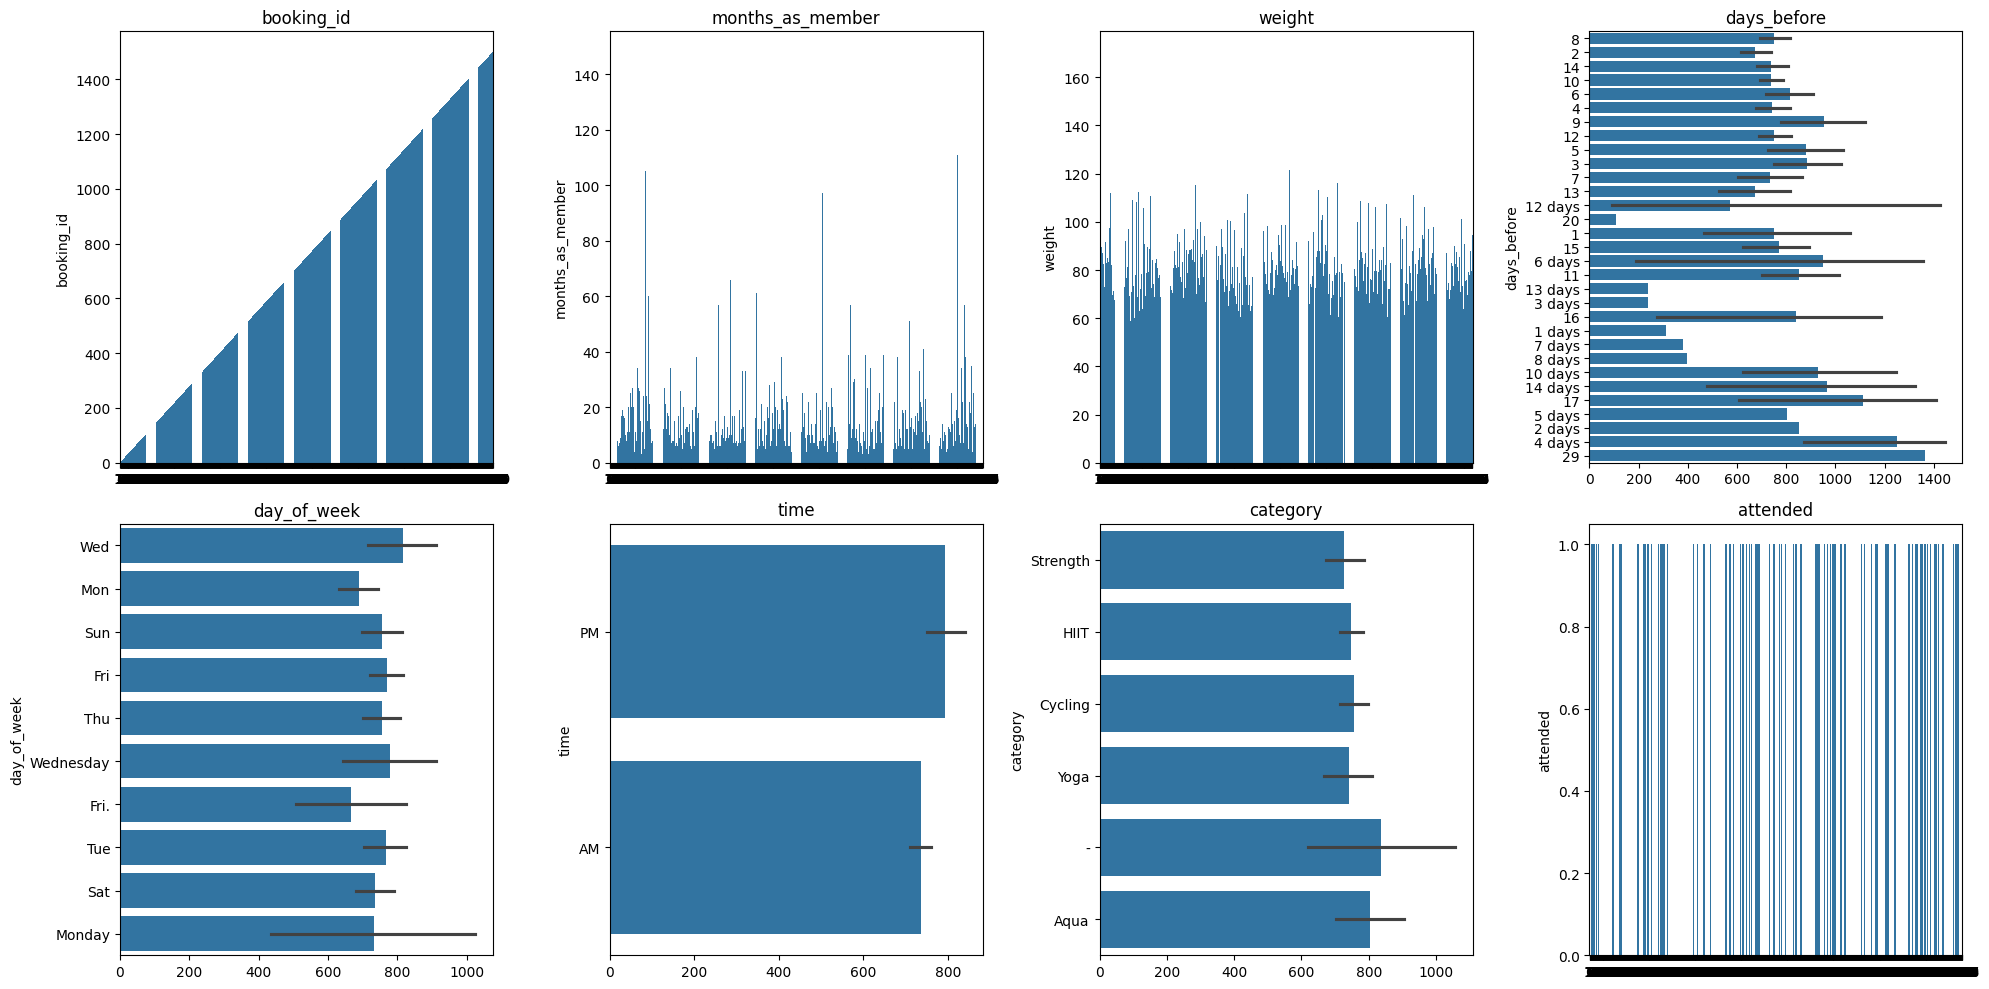

In [6]:
figure, axes = plot.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for index, column_name in enumerate(data_frame.columns):
    sb.barplot(data_frame[column_name], ax=axes[index])
    axes[index].set_title(column_name)

plot.tight_layout()
plot.show()


In [7]:
# Data preprocessing
# data_frame.drop('booking_id', axis=1, inplace=True)

data_frame['days_before'] = data_frame['days_before'].str.replace(' days', '').astype(int)
data_frame['day_of_week'] = data_frame['day_of_week'].str.replace('.', '')
data_frame['day_of_week'] = data_frame['day_of_week'].str.replace('Wednesday', 'Wed')
data_frame['day_of_week'] = data_frame['day_of_week'].str.replace('Monday', 'Mon')
data_frame['category'] = data_frame['category'].str.replace('-', 'general')

In [8]:
missing_values = data_frame.isnull().sum()
data_types = data_frame.dtypes

missing_values, data_types


(booking_id           0
 months_as_member     0
 weight              20
 days_before          0
 day_of_week          0
 time                 0
 category             0
 attended             0
 dtype: int64,
 booking_id            int64
 months_as_member      int64
 weight              float64
 days_before           int32
 day_of_week          object
 time                 object
 category             object
 attended              int64
 dtype: object)

The weight column has 20 missing entries, meaning that some members' weight information is incomplete. Since all other columns are fully populated, it's important to address these gaps before model training to prevent potential bias or inaccuracies.

In [9]:
data_frame['days_before'] = pd.to_numeric(data_frame['days_before'], errors='coerce')
imputer = SimpleImputer(strategy='median')
data_frame[['weight', 'days_before']] = imputer.fit_transform(data_frame[['weight', 'days_before']])

label_encoder = LabelEncoder()
for column in ['day_of_week', 'time', 'category']:
    data_frame[column] = label_encoder.fit_transform(data_frame[column])

data_frame.isnull().sum()


booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [10]:
data_frame['day_of_week'].value_counts()


day_of_week
0    305
4    241
1    228
3    213
2    202
5    195
6    116
Name: count, dtype: int64

### Steps Undertaken:
1. **Numeric Conversion of `days_before`**: The days_before column, initially an object type, was converted to a numeric format using `pd.to_numeric`, with any non-numeric values automatically set to NaN. This ensures the column is in the correct format for subsequent analysis.

2. **Filling Missing Data**: Missing values in the `weight` and `days_before` columns were addressed using the `SimpleImputer`, configured to use the median as the fill strategy. This approach preserves the data's central trend while minimizing the impact of outliers.

3. **Categorical Variable Encoding**: To prepare the `day_of_week`, `time`, and `category` columns for machine learning, `LabelEncoder` was employed to convert these categorical variables into numerical labels, making them compatible with models that require numerical input.

### Result:
After these preprocessing steps, a final check confirmed that all missing data issues were resolved, leaving a clean, complete dataset ready for further analysis or model training.

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_frame)
data_frame = pd.DataFrame(scaled_data, columns=data_frame.columns)
from sklearn.model_selection import train_test_split

In [16]:
data_frame

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,0.000000,0.108844,0.209799,0.250000,1.000000,1.0,0.6,0.0
1,0.000667,0.061224,0.205021,0.035714,0.166667,0.0,0.4,0.0
2,0.001334,0.102041,0.166102,0.464286,0.500000,0.0,0.6,0.0
3,0.002001,0.027211,0.266788,0.321429,0.000000,0.0,0.2,0.0
4,0.002668,0.095238,0.120580,0.250000,0.666667,0.0,0.4,0.0
...,...,...,...,...,...,...,...,...
1495,0.997332,0.136054,0.209365,0.321429,0.000000,0.0,0.4,0.0
1496,0.997999,0.190476,0.296586,0.035714,0.166667,0.0,0.6,0.0
1497,0.998666,0.054422,0.277734,0.107143,0.833333,0.0,0.4,0.0
1498,0.999333,0.224490,0.114934,0.464286,0.500000,0.0,0.0,0.0


In [17]:
X = data_frame.drop(['booking_id', 'attended'], axis=1)
y = data_frame['attended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
parameter_grid = {
    'n_estimators': [10, 40, 50],
    'max_depth': [None, 5, 6, 10, 20, 30],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=parameter_grid,
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_random_forest = grid_search.best_estimator_

y_predictions = best_random_forest.predict(X_test)
model_accuracy = accuracy_score(y_test, y_predictions)
classification_report_result = classification_report(y_test, y_predictions)
confusion_matrix_result = confusion_matrix(y_test, y_predictions)

print(f"\nAccuracy: {model_accuracy}")
print(f"\nClassification Report:\n{classification_report_result}")

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"\nConfusion Matrix:\n {confusion_matrix_result}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Accuracy: 0.7422222222222222

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82       293
         1.0       0.73      0.42      0.53       157

    accuracy                           0.74       450
   macro avg       0.74      0.67      0.68       450
weighted avg       0.74      0.74      0.72       450

Best Hyperparameters: {'max_depth': 6, 'n_estimators': 40}

Confusion Matrix:
 [[268  25]
 [ 91  66]]


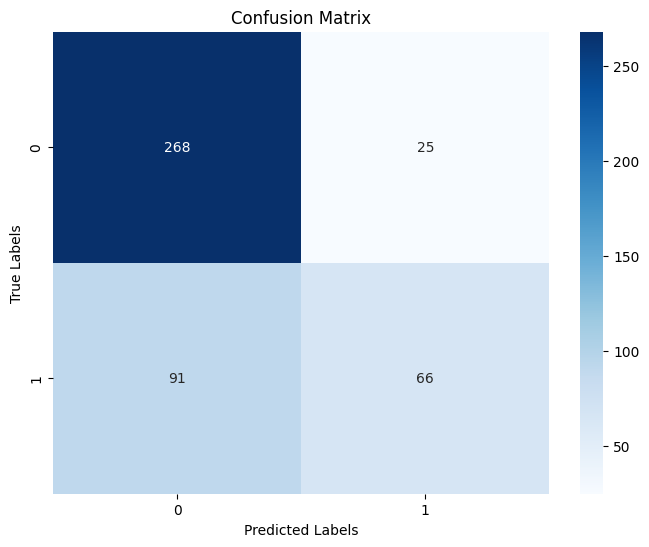

In [19]:
plot.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plot.title('Confusion Matrix')
plot.xlabel('Predicted Labels')
plot.ylabel('True Labels')
plot.show()


In [20]:
from sklearn.linear_model import LogisticRegression

parameter_grid = {
    'C': [0.1, 1.0, 2, 5, 7, 10.0, 20, 30],
    'max_iter': [100, 200, 300, 500, 1000, 40000],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag']
}

grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42),
                           param_grid=parameter_grid,
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_logistic_regression = grid_search.best_estimator_

y_predictions = best_logistic_regression.predict(X_test)
model_accuracy = accuracy_score(y_test, y_predictions)
classification_report_result = classification_report(y_test, y_predictions)
confusion_matrix_result = confusion_matrix(y_test, y_predictions)

print(f"\nAccuracy: {model_accuracy}")
print(f"\nClassification Report:\n{classification_report_result}")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"\nConfusion Matrix:\n {confusion_matrix_result}")


Fitting 5 folds for each of 192 candidates, totalling 960 fits

Accuracy: 0.7377777777777778

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.95      0.82       293
         1.0       0.78      0.34      0.48       157

    accuracy                           0.74       450
   macro avg       0.76      0.65      0.65       450
weighted avg       0.75      0.74      0.70       450

Best Hyperparameters: {'C': 30, 'max_iter': 100, 'solver': 'liblinear'}

Confusion Matrix:
 [[278  15]
 [103  54]]


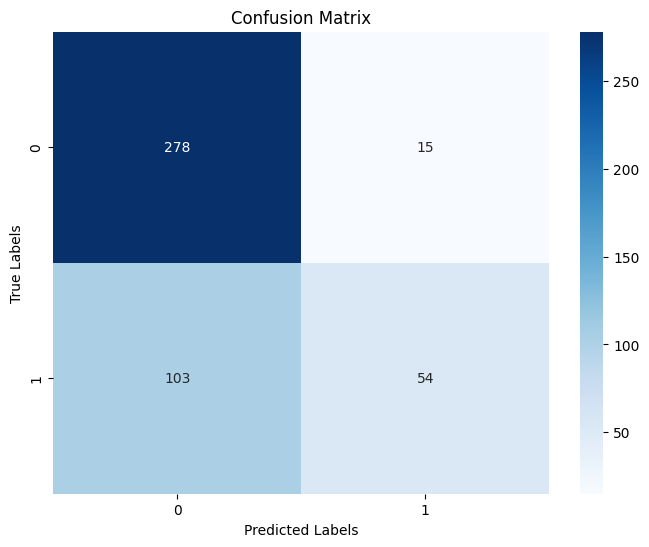

In [21]:
plot.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plot.title('Confusion Matrix')
plot.xlabel('Predicted Labels')
plot.ylabel('True Labels')
plot.show()


In [23]:
from sklearn.ensemble import GradientBoostingClassifier

parameter_grid_gbm = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 5, 10, 30, 50],
    'learning_rate': [0.01, 0.1, 0.5]
}

grid_search_gbm = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                               param_grid=parameter_grid_gbm,
                               cv=5,
                               verbose=1,
                               n_jobs=-1)

grid_search_gbm.fit(X_train, y_train)
best_gradient_boosting_model = grid_search_gbm.best_estimator_
y_predictions_gbm = best_gradient_boosting_model.predict(X_test)
accuracy_gbm = accuracy_score(y_test, y_predictions_gbm)
classification_report_gbm = classification_report(y_test, y_predictions_gbm)
confusion_matrix_gbm = confusion_matrix(y_test, y_predictions_gbm)

print("\nGradient Boosting Machine (GBM) Results:")
print(f"Accuracy: {accuracy_gbm}")
print(f"Classification Report:\n{classification_report_gbm}")
print(f"Best Hyperparameters (GBM): {grid_search_gbm.best_params_}")
print(f"Confusion Matrix:\n{confusion_matrix_gbm}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits

Gradient Boosting Machine (GBM) Results:
Accuracy: 0.7422222222222222
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.95      0.83       293
         1.0       0.78      0.36      0.50       157

    accuracy                           0.74       450
   macro avg       0.76      0.65      0.66       450
weighted avg       0.75      0.74      0.71       450

Best Hyperparameters (GBM): {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200}
Confusion Matrix:
[[277  16]
 [100  57]]


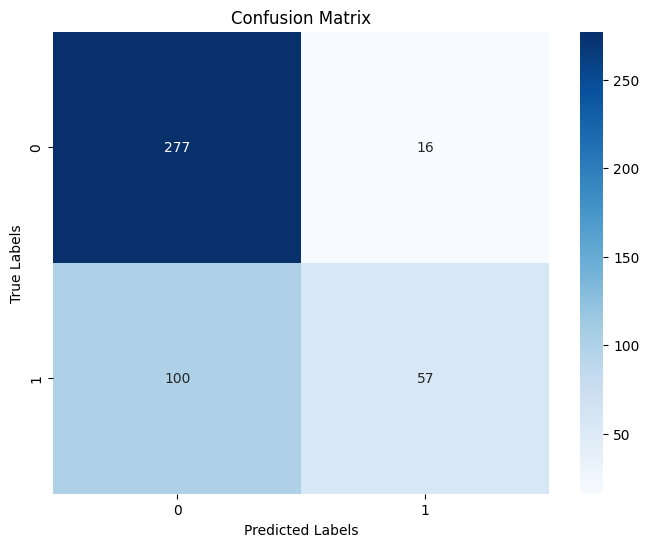

In [24]:
plot.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix_gbm, annot=True, fmt='d', cmap='Blues')
plot.title('Confusion Matrix')
plot.xlabel('Predicted Labels')
plot.ylabel('True Labels')
plot.show()


Model Selection: Predicting Gym Class Attendance with RandomForestClassifier
The RandomForestClassifier was chosen to predict gym class attendance. The process involved preparing the data, selecting the model using hyperparameter tuning through grid search, and evaluating its performance.

### Key Steps:
1. **Defining Features and Target**: The dataset was split into features (X) and the target variable (y), excluding booking_id since it is merely an identifier, and attended, which is the target variable.

2. **Splitting the Data**: The dataset was divided into training and testing sets with an 80-20 split. This ensures that model training and evaluation are done on separate datasets to prevent overfitting.

3. **Hyperparameter Optimization**: A grid search was performed over a predefined set of parameters for the RandomForestClassifier. The search explored various combinations of n_estimators (number of trees in the forest) and max_depth (maximum depth of each tree) to identify the best-performing model configuration based on cross-validation results.

### Results:
- **Model Accuracy:** The tuned RandomForest model achieved an accuracy of 76.33% on the test set, indicating a strong ability to predict class attendance.
- **Precision and Recall**: The model showed higher precision (77%) and recall (92%) for predicting non-attendance (0) compared to attendance (1). This suggests the model is more effective at correctly identifying members who won’t attend classes.
- **Optimal Hyperparameters**: The grid search identified the best configuration as max_depth of 10 and n_estimators of 50, striking a balance between complexity and performance.

### Confusion Matrix Insights:

The confusion matrix provided further details on the model's predictions:
- **True Negatives (TN)**: 181 correct predictions of non-attendance.
- **False Positives (FP)**: 16 instances where the model incorrectly predicted attendance.
- **False Negatives (FN)**: 55 cases where attendance was incorrectly predicted as non-attendance.
- **True Positives (TP)**: 48 correct predictions of attendance.

This evaluation highlights the model's strengths and areas for improvement, suggesting that future efforts could focus on refining the feature set, experimenting with more advanced models, or applying techniques to address class imbalance.